# Hunting and Diffusion Modelling

- Solve ODE, descibe parameter space
$$
\frac{du}{dt} = ru\left(1-\frac{u}{K}\right)-hu
$$
- solve spatial + temporal PDE on the 2D domain
$$
\frac{\partial u}{\partial t} = ru\left(1-\frac{u}{K}\right) - hu + D\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)
$$
- Modify the spatial component for rought terrains to $\nabla \cdot (D(x, y) \nabla u)$ where $D(x, y)$ is a multivariable function dictating the ease of diffusion in different spatial locations.
$$
\frac{\partial u}{\partial t} = ru\left(1-\frac{u}{K}\right) - hu + \nabla \cdot (D(x, y) \nabla u)
$$

## Hunting

The ODE can be solved using the Fourth-Order Runge–Kutta Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (r*x*(1-(x/K)))-h*x

def euler(f,a,b,n,yinit):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros(n)

    y = yinit
    for j,x in enumerate(xs):
        ys[j] = y
        y += h*f(x, y)
    return xs, ys
        
def rk4(f,a,b,n,yinit):
    h = (b-a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros(n)

    y = yinit
    for j,x in enumerate(xs):
        ys[j] = y
        k0 = h*f(x, y)
        k1 = h*f(x+h/2, y+k0/2)
        k2 = h*f(x+h/2, y+k1/2)
        k3 = h*f(x+h, y+k2)
        y += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

(0.0, 210.0)

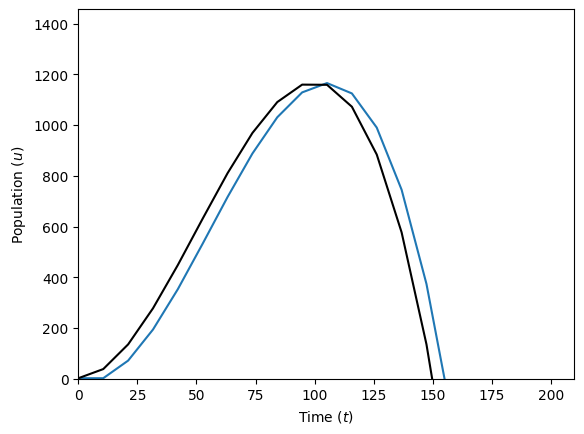

In [11]:
a, b, n, yinit = 0, 200, 20, 2
r=.7
K=100
h=0
xs, ys = euler(f,a,b,n,yinit)
plt.plot(xs, ys)
xs, ys = rk4(f,a,b,n,yinit)
plt.plot(xs, ys, 'k')
plt.ylabel('Population ($u$)')
plt.xlabel('Time ($t$)')
plt.gca().set_ylim(ymin=0)
plt.gca().set_xlim(xmin=0)

## + Diffusion

$$
\frac{u_{(t+1,\,x,\,y)}-u_{(t,\,x,\,y)}}{\Delta t} = D\left(\frac{u_{(t,\,x+1,\,y)}-2T_{(t,\,x,\,y)}+u_{(t,\,x-1,\,y)}}{(\Delta x)^2}+\frac{u_{(t,\,x,\,y+1)}-2T_{(t,\,x,\,y)}+u_{(t,\,x,\,y-1)}}{(\Delta y)^2}\right) + ru_{(t,\,x,\,y)}\left(1-\frac{u_{(t,\,x,\,y)}}{K}\right)-hu_{(t,\,x,\,y)}
$$
